In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib

plt.rcParams["figure.figsize"] = (15, 7)

In [2]:
def get_evolution_matrix(N_iter, rs, xs):
    """
    From r_list,x_list, make tensor M_i = M[r_j,x_k,time_i]
    and make evolution of whole matrix as M_i = rs * M_(i-1) * (1-M_(i-1))
    return tensor M_i = M[r_j,x_k,time_i]
    """
    mat = np.zeros((xs.shape[0], rs.shape[0], N_iter)) # float by default
    mat[:, :, 0] = np.meshgrid(rs, xs)[1]
    for t in range(1, N_iter):
        mat[:, :, t] = rs * mat[:, :, t - 1] * (1 - mat[:, :, t - 1])
    return mat


def get_last_m(mat, m, n):
    """
    From tensor M take elements from time_n to time_(n + m)

    """
    return mat[:, :, n : n + m]

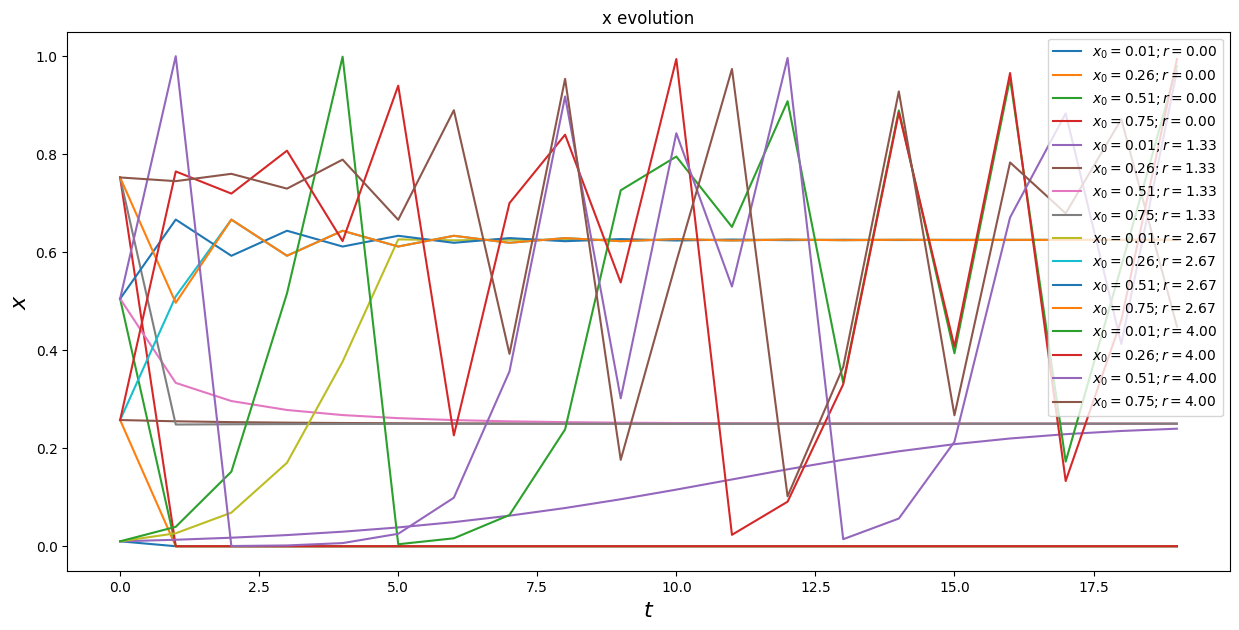

In [3]:
rs = np.linspace(0, 4, 4) # float by default
xs = np.linspace(0.01, 1, 4,endpoint=False) # float by default
N_iter = 20
mat = get_evolution_matrix(N_iter, rs, xs)

### plot ####
for r_ind, r in enumerate(rs):
    for x_ind, x in enumerate(xs):
        plt.plot(mat[x_ind, r_ind, :], label=f"$x_0 ={x:.2f}; r = {r:.2f}$")
plt.title("x evolution")
plt.ylabel("$x$", fontsize=16)
plt.xlabel("$t$", fontsize=16)
plt.legend()
plt.show()

In [4]:
N_iter = 1000
resolution = 800
rs = np.linspace(0, 4, resolution) # float by default
xs = np.linspace(0.001, 1, resolution // 2,endpoint=False) # float by default
mat = get_evolution_matrix(N_iter, rs, xs)
m = 10
last_mat = get_last_m(mat, m, N_iter - m)

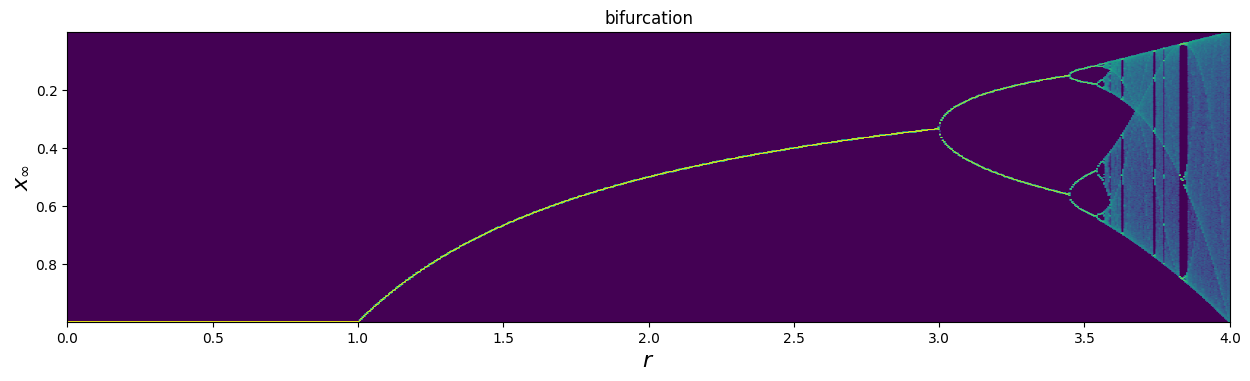

In [5]:
#### plot #####
img = np.zeros((last_mat.shape[0], last_mat.shape[1]),dtype=np.uint64) + 1
### to img_pixel_jk add + 1 when mat converge to x_j, r_k 
for t in range(m):
    for r_ind, r in enumerate(rs):
        for x in last_mat[:, r_ind, t]:
            img[int(x * xs.shape[0]), r_ind] += 1

plt.imshow(
    img,
    # cmap="gray",
    norm=matplotlib.colors.LogNorm(),
    extent=[rs.min(), rs.max(), xs.min(), xs.max()],
)
plt.gca().invert_yaxis()
plt.title("bifurcation")
plt.xlabel("$r$", fontsize=16)
plt.ylabel("$x_{\infty}$", fontsize=16)
plt.show()